# Feature Imputation with a Heat Flux Dataset




### Context

This dataset was prepared for the journal article entitled "On the prediction of critical heat flux using a physics-informed machine learning-aided framework" (doi: 10.1016/j.applthermaleng.2019.114540). The dataset contains processed and compiled records of experimental critical heat flux and boundary conditions used for the work presented in the article.

### Acknowledgements
Zhao, Xingang (2020), “Data for: On the prediction of critical heat flux using a physics-informed machine learning-aided framework”, Mendeley Data, V1, doi: 10.17632/5p5h37tyv7.1

## Data Description

| Column | Description |
| :- | :- |
| **author** |  |
| **geometry** |  |
| **pressure** | (**MPa**) |
| **mass_flux** | (**kg/m<sup>2</sup>s**) |
| **D_e** | (**mm**) |
| **D_h** | (**mm**) |
| **length** | (**mm**) |
| **chf_exp** | (**MW/m<sup>2</sup>**) |
| **x_e_out** | Target variable |

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in Train Data
print("\033[1mTRAIN DATA\033[0m")

data = pd.read_csv("data.csv", index_col='id')
data_tr = data[data['x_e_out [-]'].notnull()]
print("Data has \033[1m{} rows\033[0m and \033[1m{} columns\033[0m \n".format(data_tr.shape[0], data_tr.shape[1]))

print(f"\n\033[1mThere are {data.duplicated().sum()} rows of duplicated values\033[0m\n")
#data = data.drop_duplicates()

# Look at data summary and the head rows
print("\n\033[1mOverall data summary below\033[0m")
desc = data_tr.describe(include='all').T
desc['null'] = data_tr.isna().sum()
desc['type'] = data_tr.dtypes
desc['unique'] = data_tr.nunique()
display(desc)

data_tr['source'] = 'Train'



print("\n\033[1mFirst 5 rows of data below\033[0m")
display(data_tr.head())

target_col = 'x_e_out [-]'

TRAIN DATA
Data has 21229 rows and 9 columns 


There are 258 rows of duplicated values


Overall data summary below


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null,type
author,17826,10,Thompson,11621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3403,object
geometry,17516,3,tube,14121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3713,object
pressure [MPa],18243.0,140,NaN,NaN,10.635066,4.332943,0.1,6.89,11.03,13.79,20.68,2986,float64
mass_flux [kg/m2-s],18002.0,689,NaN,NaN,3070.487779,1784.873142,0.0,1505.0,2730.0,4069.0,7975.0,3227,float64
x_e_out [-],21229.0,1682,NaN,NaN,-0.000453,0.100911,-0.8667,-0.0466,0.0038,0.0648,0.232,0,float64
D_e [mm],17588.0,41,NaN,NaN,8.589305,5.132207,1.0,4.7,7.8,10.8,37.5,3641,float64
D_h [mm],18102.0,47,NaN,NaN,14.215446,19.913594,1.0,5.6,10.0,11.5,120.0,3127,float64
length [mm],18072.0,65,NaN,NaN,830.564962,671.14217,10.0,318.0,610.0,914.0,3048.0,3157,float64
chf_exp [MW/m2],21229.0,109,NaN,NaN,3.809129,1.988009,0.8,2.4,3.4,4.7,19.3,0,float64



First 5 rows of data below


,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],source
id,,,,,,,,,,
0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6,Train
1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2,Train
2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5,Train
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0,Train
5,NaN,NaN,17.24,3648.0,-0.0711,NaN,1.9,696.0,3.6,Train


In [3]:
# Read in Test Data
print("\033[1mTEST DATA\033[0m")

data_test = data[data['x_e_out [-]'].isnull()]
print("Data has \033[1m{} rows\033[0m and \033[1m{} columns\033[0m \n".format(data_test.shape[0], data_test.shape[1]))

print(f"\n\033[1mThere are {data_test.duplicated().sum()} rows of duplicated values\033[0m\n")

# Look at data summary and the head rows
print("\n\033[1mOverall data summary below\033[0m")
desc = data_test.describe(include='all').T
desc['null'] = data_test.isna().sum()
desc['type'] = data_test.dtypes
desc['unique'] = data_test.nunique()
display(desc)

data_test['source'] = 'Test'


print("\n\033[1mFirst 5 rows of data below\033[0m")
display(data_test.head())

TEST DATA
Data has 10415 rows and 9 columns 


There are 250 rows of duplicated values


Overall data summary below


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null,type
author,8794,10,Thompson,5775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1621,object
geometry,8628,3,tube,7024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1787,object
pressure [MPa],8949.0,118,NaN,NaN,10.65233,4.335409,0.1,6.89,11.07,13.79,20.68,1466,float64
mass_flux [kg/m2-s],8851.0,619,NaN,NaN,3062.973562,1761.066107,0.0,1519.0,2740.0,4069.0,7975.0,1564,float64
x_e_out [-],0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10415,float64
D_e [mm],8568.0,37,NaN,NaN,8.711263,5.29315,1.0,5.0,8.5,10.8,37.5,1847,float64
D_h [mm],8953.0,44,NaN,NaN,14.091198,19.686604,1.0,5.6,10.0,11.5,120.0,1462,float64
length [mm],8813.0,60,NaN,NaN,837.954839,674.676666,10.0,318.0,610.0,914.0,3048.0,1602,float64
chf_exp [MW/m2],10415.0,109,NaN,NaN,3.772232,1.97564,0.8,2.4,3.4,4.6,19.3,0,float64



First 5 rows of data below


,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],source
id,,,,,,,,,,
4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8,Test
7,Peskov,tube,18.00,750.0,NaN,10.0,10.0,1650.0,2.2,Test
10,Thompson,tube,NaN,NaN,NaN,1.9,1.9,152.0,3.2,Test
12,Thompson,NaN,6.89,7500.0,NaN,NaN,12.8,1930.0,4.8,Test
23,Beus,annulus,15.51,1355.0,NaN,5.6,15.2,2134.0,2.1,Test


In [4]:
# Read in External Data
print("\033[1mEXTERNAL DATA\033[0m")


data_ext = pd.read_csv("original.csv", index_col='id')
print("Data has \033[1m{} rows\033[0m and \033[1m{} columns\033[0m \n".format(data_ext.shape[0], data_ext.shape[1]))

print(f"\n\033[1mThere are {data_ext.duplicated().sum()} rows of duplicated values\033[0m\n")
#data_ext = data_ext.drop_duplicates()

# Look at data summary and the head rows
print("\n\033[1mOverall data summary below\033[0m")
desc = data_ext.describe(include='all').T
desc['null'] = data_ext.isna().sum()
desc['type'] = data_ext.dtypes
desc['unique'] = data_ext.nunique()
display(desc)

data_ext['source'] = 'Original'


print("\n\033[1mFirst 5 rows of data below\033[0m")
display(data_ext.head())

EXTERNAL DATA
Data has 1865 rows and 9 columns 


There are 49 rows of duplicated values


Overall data summary below


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null,type
author,1865,10,Thompson,1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
geometry,1865,3,tube,1439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
pressure [MPa],1865.0,114,NaN,NaN,10.010949,4.282715,0.1,6.89,10.34,13.79,20.68,0,float64
mass_flux [kg/m2-s],1865.0,578,NaN,NaN,2862.647721,1656.412247,0.0,1519.0,2590.0,3933.0,7975.0,0,int64
x_e_out [-],1865.0,1360,NaN,NaN,0.016179,0.117575,-0.8667,-0.0483,0.0244,0.1006,0.232,0,float64
D_e [mm],1865.0,36,NaN,NaN,9.417212,6.333807,1.0,5.6,8.5,11.1,37.5,0,float64
D_h [mm],1865.0,41,NaN,NaN,16.167721,21.18287,1.0,5.6,10.3,15.2,120.0,0,float64
length [mm],1865.0,54,NaN,NaN,911.340483,726.718974,10.0,432.0,625.0,1778.0,3048.0,0,int64
chf_exp [MW/m2],1865.0,109,NaN,NaN,3.854638,1.985535,0.8,2.4,3.5,4.8,19.3,0,float64



First 5 rows of data below


,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],source
id,,,,,,,,,,
1,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3,Original
2,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6,Original
3,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3,Original
4,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8,Original
5,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0,Original


In [5]:
print("\033[1mALL DATA\033[0m")

data_all = pd.concat([data_tr.drop(target_col, axis=1), data_ext.drop(target_col, axis=1), data_test.drop(target_col, axis=1)], ignore_index=True)
print("Data has \033[1m{} rows\033[0m and \033[1m{} columns\033[0m \n".format(data_all.shape[0], data_all.shape[1]))

print(f"\n\033[1mThere are {data_all.duplicated().sum()} rows of duplicated values\033[0m\n")
#data_ext = data_ext.drop_duplicates()

# Look at data summary and the head rows
print("\n\033[1mOverall data summary below\033[0m")
desc = data_all.describe(include='all').T
desc['null'] = data_all.isna().sum()
desc['type'] = data_all.dtypes
desc['unique'] = data_all.nunique()
display(desc)


print("\n\033[1mFirst 5 rows of data below\033[0m")
data_all.head()

ALL DATA
Data has 33509 rows and 9 columns 


There are 1281 rows of duplicated values


Overall data summary below


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null,type
author,28485,10,Thompson,18598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5024,object
geometry,28009,3,tube,22584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5500,object
pressure [MPa],29057.0,144,NaN,NaN,10.600324,4.333106,0.1,6.89,11.03,13.79,20.68,4452,float64
mass_flux [kg/m2-s],28718.0,734,NaN,NaN,3054.674351,1770.14477,0.0,1519.0,2729.0,4069.0,7975.0,4791,float64
D_e [mm],28021.0,43,NaN,NaN,8.681699,5.273409,1.0,5.0,7.8,10.8,37.5,5488,float64
D_h [mm],28920.0,50,NaN,NaN,14.30288,19.93355,1.0,5.6,10.3,11.5,120.0,4589,float64
length [mm],28750.0,70,NaN,NaN,838.070122,676.224288,10.0,318.0,610.0,914.0,3048.0,4759,float64
chf_exp [MW/m2],33509.0,109,NaN,NaN,3.800194,1.984091,0.8,2.4,3.4,4.6,19.3,0,float64
source,33509,3,Train,21229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object



First 5 rows of data below


,author,geometry,pressure [MPa],mass_flux [kg/m2-s],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],source
0,Thompson,tube,7.00,3770.0,NaN,10.8,432.0,3.6,Train
1,Thompson,tube,NaN,6049.0,10.3,10.3,762.0,6.2,Train
2,Thompson,NaN,13.79,2034.0,7.7,7.7,457.0,2.5,Train
3,Beus,annulus,13.79,3679.0,5.6,15.2,2134.0,3.0,Train
4,NaN,NaN,17.24,3648.0,NaN,1.9,696.0,3.6,Train


In [6]:
print("\033[1mTRAIN + EXTERNAL DATA\033[0m")

data_trext = pd.concat([data_tr, data_ext])
print("Data has \033[1m{} rows\033[0m and \033[1m{} columns\033[0m \n".format(data_trext.shape[0], data_trext.shape[1]))

print(f"\n\033[1mThere are {data_trext.duplicated().sum()} rows of duplicated values\033[0m\n")
#data_ext = data_trext.drop_duplicates()

# Look at data summary and the head rows
print("\n\033[1mOverall data summary below\033[0m")
desc = data_trext.describe(include='all').T
desc['null'] = data_trext.isna().sum()
desc['type'] = data_trext.dtypes
desc['unique'] = data_trext.nunique()
display(desc)


print("\n\033[1mFirst 5 rows of data below\033[0m")
data_trext.head()

TRAIN + EXTERNAL DATA
Data has 23094 rows and 10 columns 


There are 57 rows of duplicated values


Overall data summary below


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null,type
author,19691,10,Thompson,12823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3403,object
geometry,19381,3,tube,15560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3713,object
pressure [MPa],20108.0,141,NaN,NaN,10.577179,4.331989,0.1,6.89,11.03,13.79,20.68,2986,float64
mass_flux [kg/m2-s],19867.0,693,NaN,NaN,3050.976947,1774.206168,0.0,1519.0,2726.0,4069.0,7975.0,3227,float64
x_e_out [-],23094.0,1702,NaN,NaN,0.00089,0.102455,-0.8667,-0.0466,0.0049,0.0682,0.232,0,float64
D_e [mm],19453.0,41,NaN,NaN,8.668678,5.264775,1.0,5.0,7.8,10.8,37.5,3641,float64
D_h [mm],19967.0,48,NaN,NaN,14.397796,20.043053,1.0,5.6,10.3,11.5,120.0,3127,float64
length [mm],19937.0,65,NaN,NaN,838.121081,676.924167,10.0,318.0,610.0,914.0,3048.0,3157,float64
chf_exp [MW/m2],23094.0,109,NaN,NaN,3.812804,1.987805,0.8,2.4,3.4,4.7,19.3,0,float64
source,23094,2,Train,21229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object



First 5 rows of data below


,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],source
id,,,,,,,,,,
0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6,Train
1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2,Train
2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5,Train
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0,Train
5,NaN,NaN,17.24,3648.0,-0.0711,NaN,1.9,696.0,3.6,Train


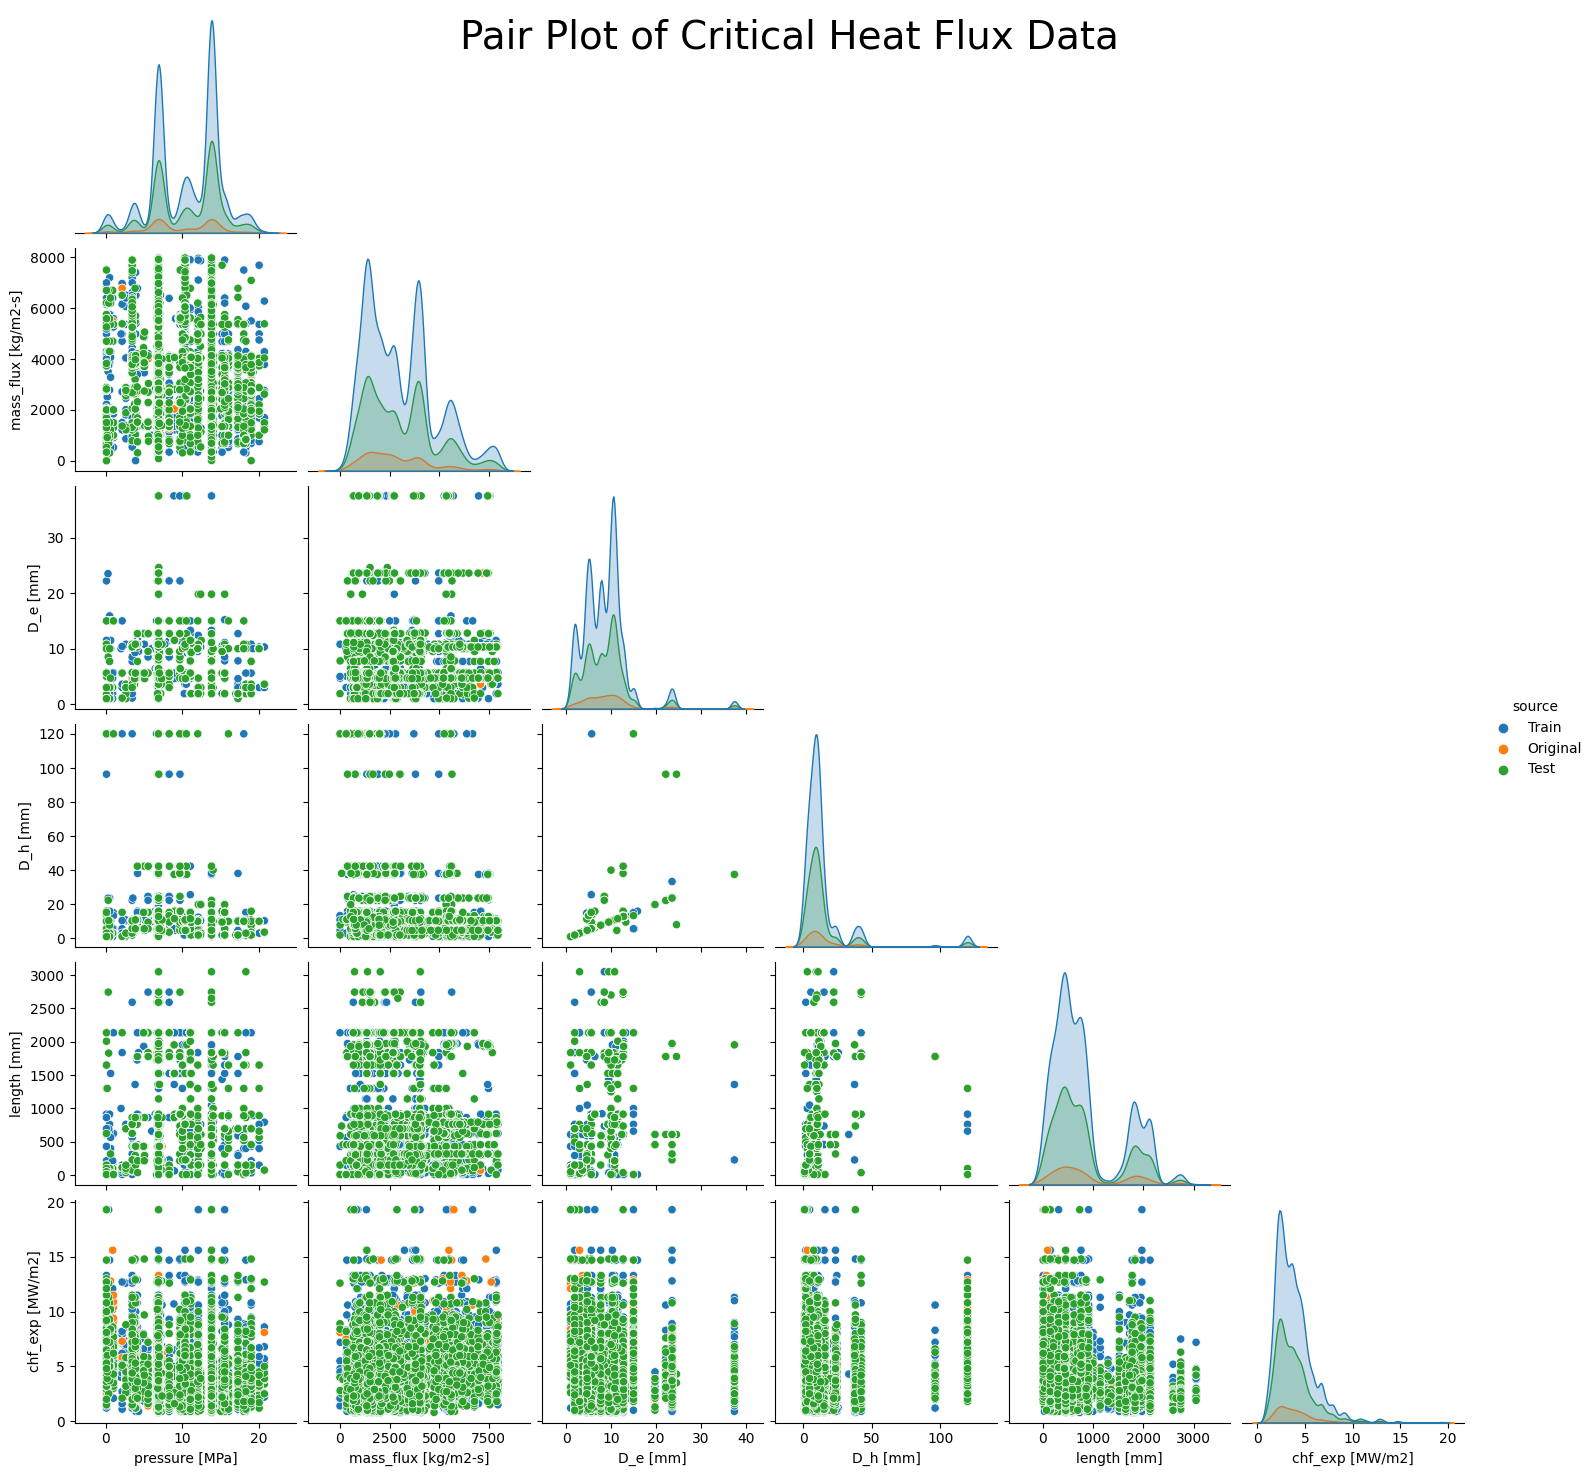

In [7]:
sns.pairplot(data_all, hue='source', corner=True)

plt.suptitle('Pair Plot of Critical Heat Flux Data', size = 28)

plt.show()

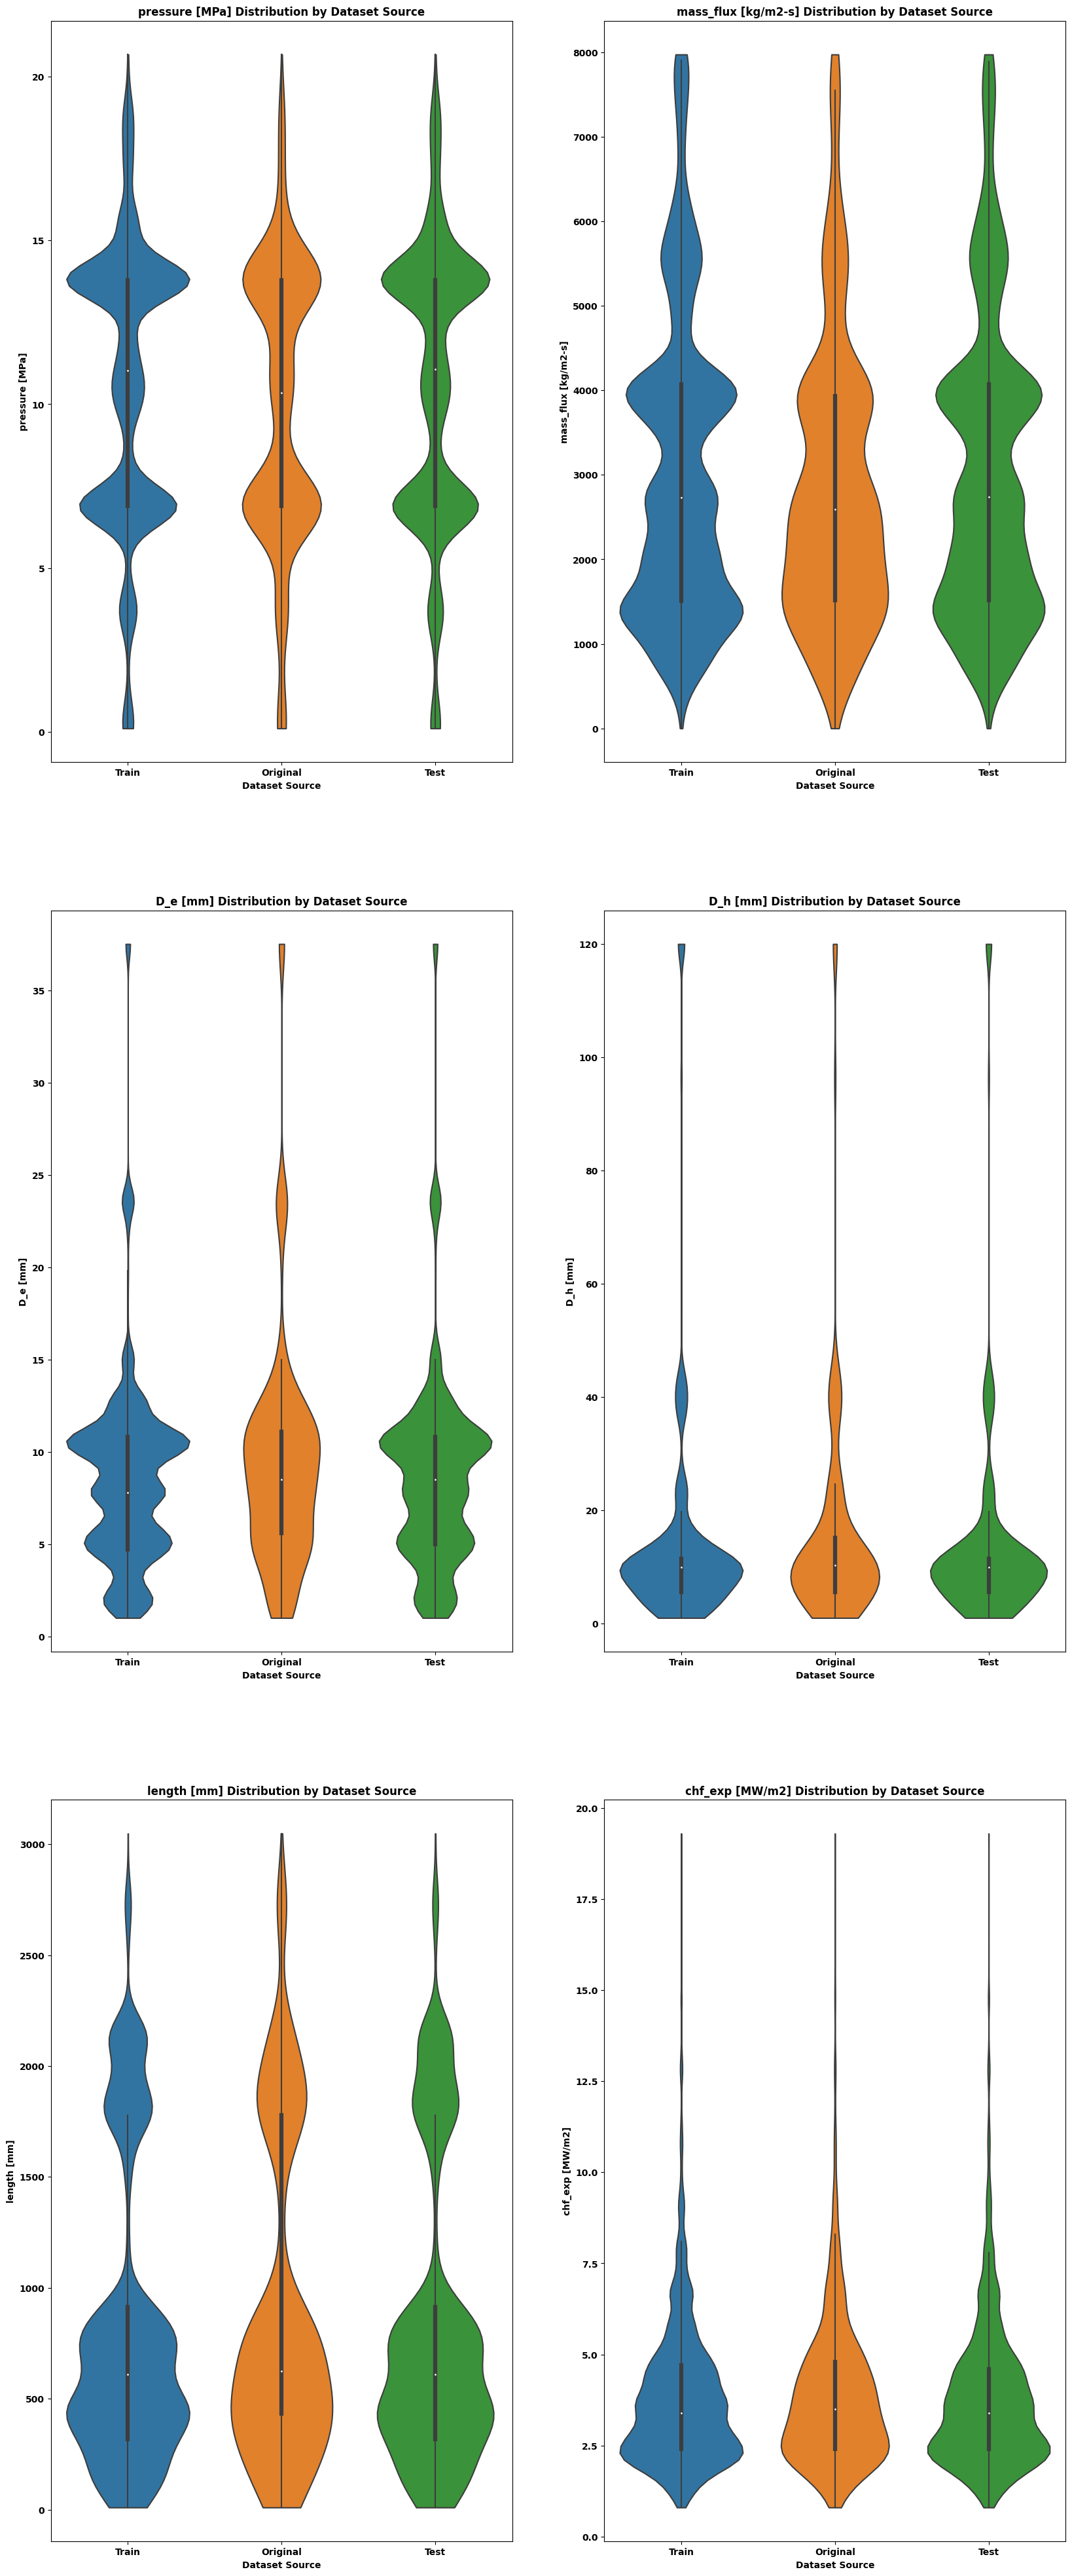

In [8]:
columns = data_all.columns[2:-1]
figrows = len(columns)//2 + (len(columns)%2 > 0)

fig, axes = plt.subplots(figrows, 2, figsize=(20,50))

for i, ax in enumerate(axes.flatten()):
    
    vplot = sns.violinplot(data=data_all, x='source', y=columns[i], cut=0, ax=ax)
    vplot.set_ylabel(columns[i], fontweight='bold')
    vplot.set_xlabel('Dataset Source', fontweight='bold')
    vplot.set_title(columns[i] + ' Distribution by Dataset Source', fontweight='bold')

    for tick in vplot.yaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')

    for tick in vplot.xaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')


plt.show()


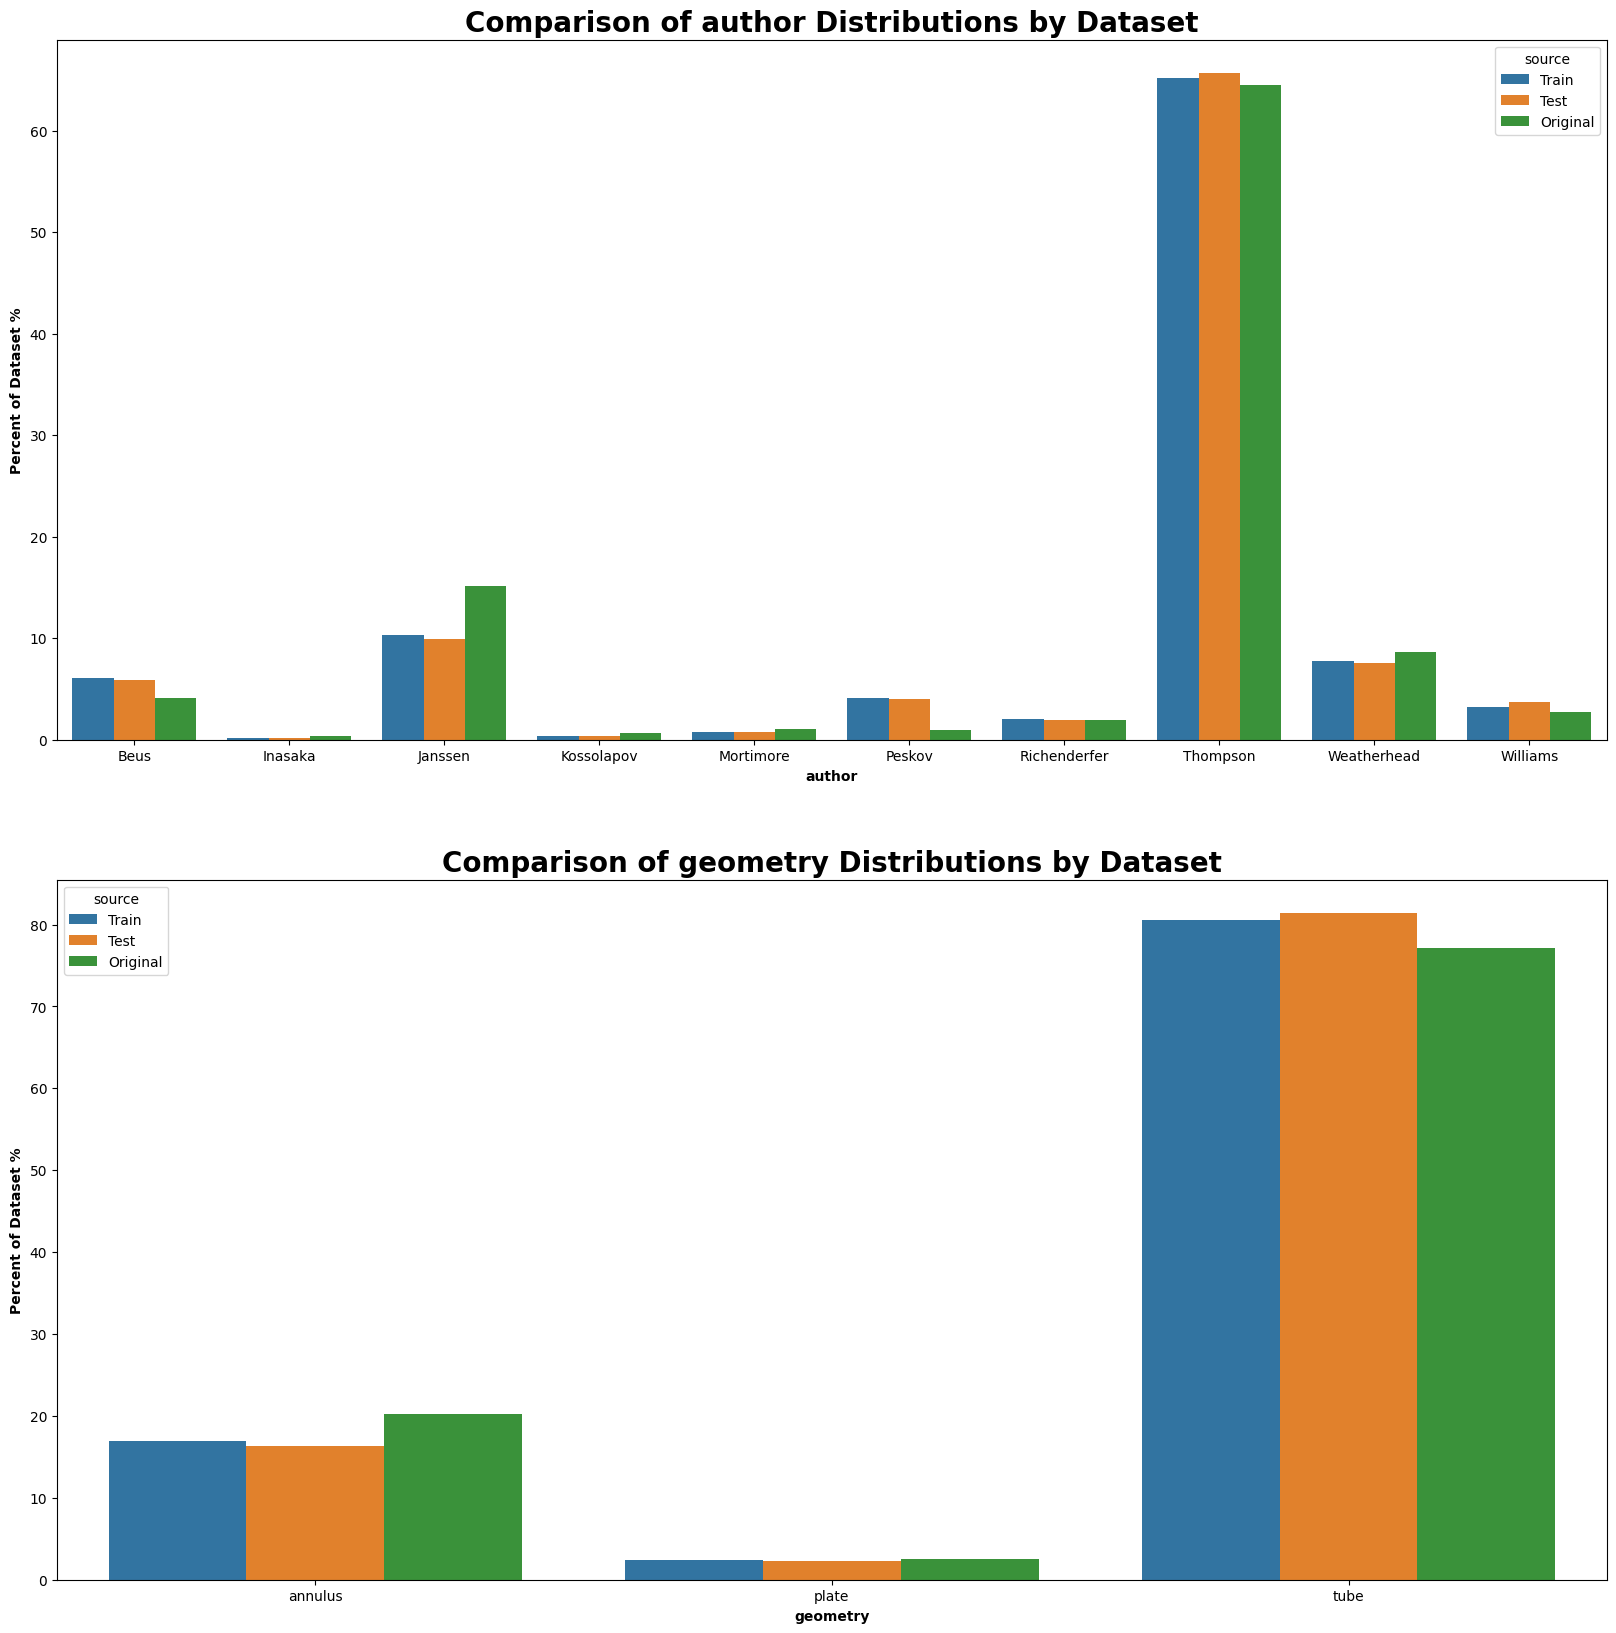

In [9]:
sources = ('Train', 'Test', 'Original')
datasets = (data_tr, data_test, data_ext)

columns = data_all.columns[:2]
figrows = len(columns)

fig, axes = plt.subplots(figrows, figsize=(20,20))

for j in range(figrows):
    
    data_plot = pd.DataFrame()
    
    for i in range(len(sources)):
        
        tmp = pd.DataFrame(datasets[i].groupby(columns[j])[columns[j]].count())
        tmp[columns[j]] = tmp[columns[j]]*100/datasets[i][datasets[i][columns[j]].notnull()].shape[0]
        tmp = tmp.rename(columns={columns[j]:'percent_of_dataset'})
        tmp['source'] = sources[i]
        tmp = tmp.reset_index()
        data_plot = pd.concat([data_plot, tmp])
    
    bplot = sns.barplot(data=data_plot, x=columns[j], y='percent_of_dataset', hue='source', ax=axes[j])
    bplot.set_xlabel(columns[j], fontweight='bold')
    bplot.set_ylabel('Percent of Dataset %', fontweight='bold')
    bplot.set_title('Comparison of ' + columns[j] + ' Distributions by Dataset', fontdict={'size':20, 'weight':'bold'})
    
plt.show()

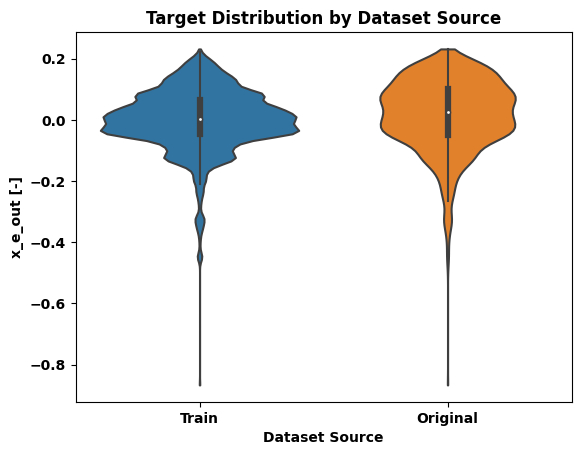

In [10]:
vplot = sns.violinplot(data=data_trext, x='source', y=target_col, cut=0)
vplot.set_ylabel(target_col, fontweight='bold')
vplot.set_xlabel('Dataset Source', fontweight='bold')
vplot.set_title('Target Distribution by Dataset Source', fontweight='bold')

for tick in vplot.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

for tick in vplot.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
    
plt.show()

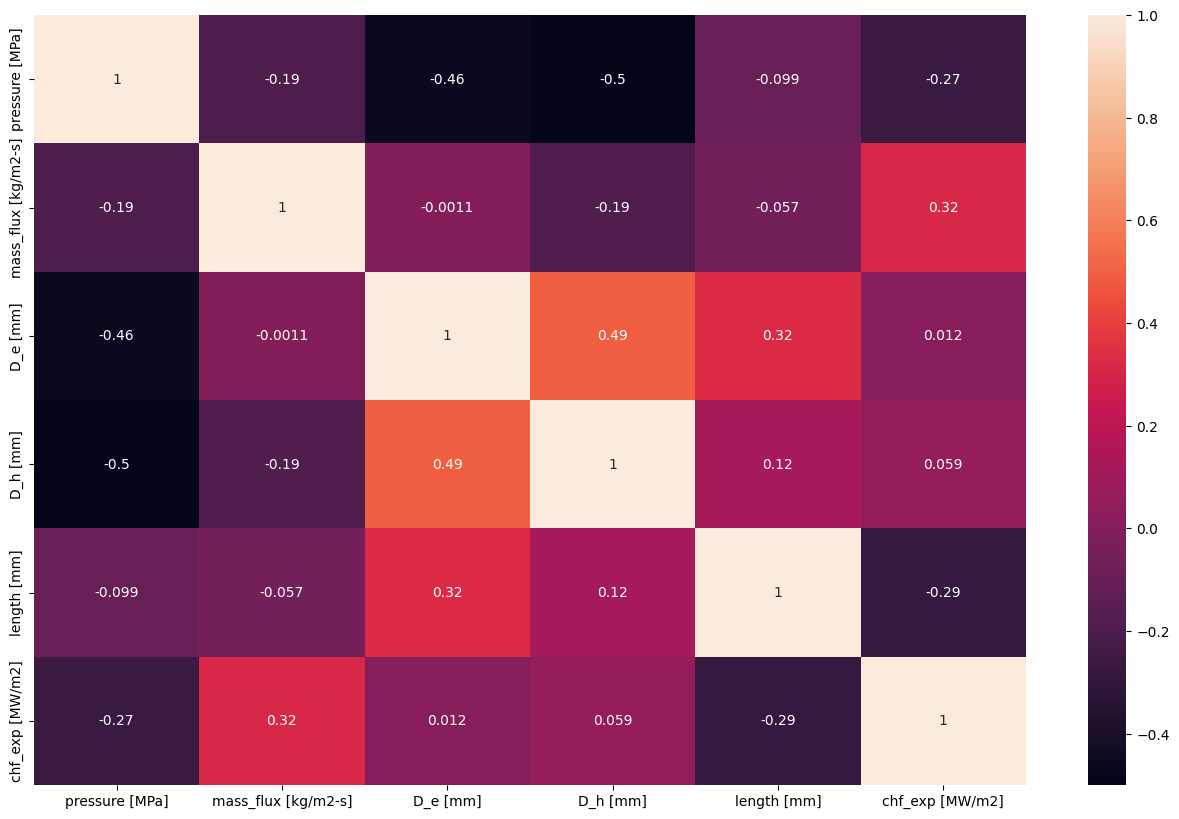

In [11]:
plt.figure(figsize = (16,10))
sns.heatmap(data_all.select_dtypes(include=np.number).corr(method = 'pearson'), annot=True)
plt.show()

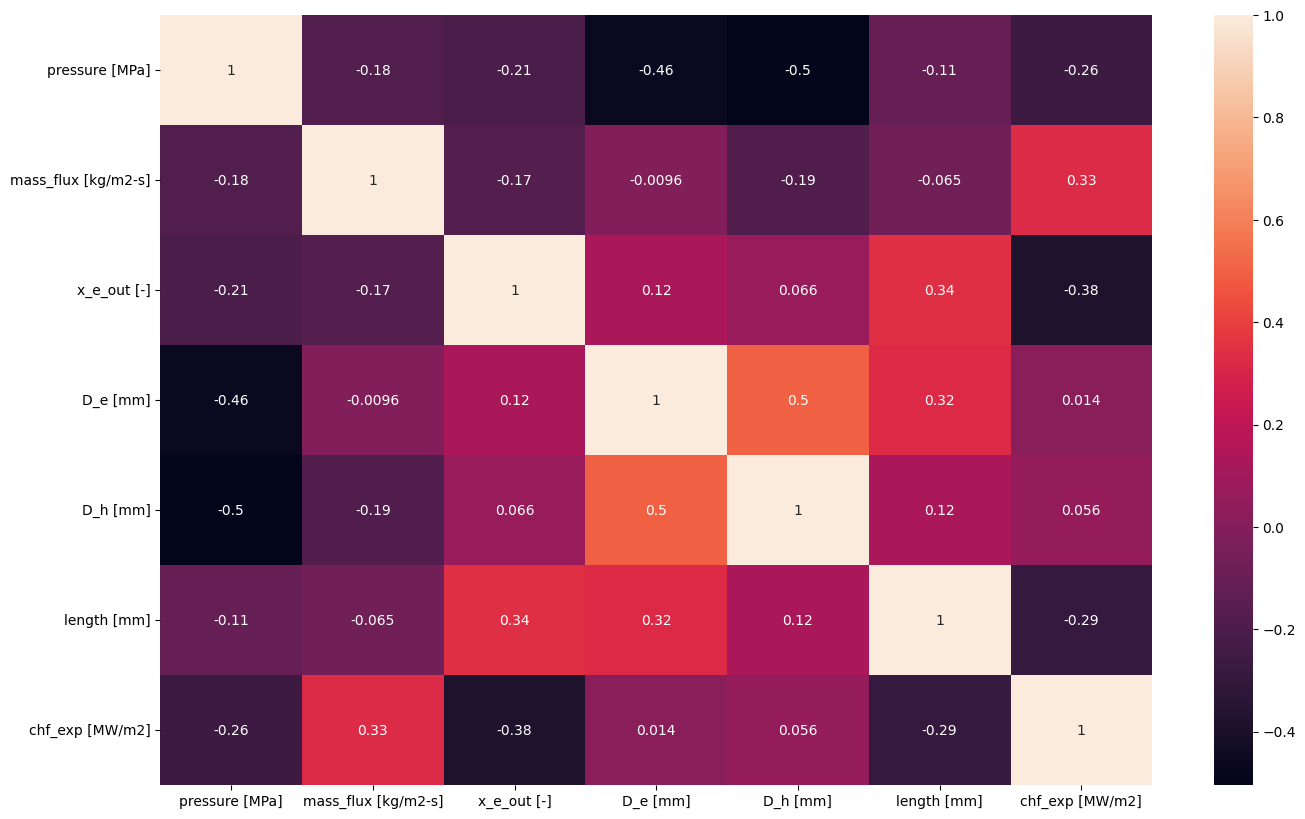

In [12]:
plt.figure(figsize = (16,10))
sns.heatmap(data_trext.select_dtypes(include=np.number).corr(method = 'pearson'), annot=True)
plt.show()

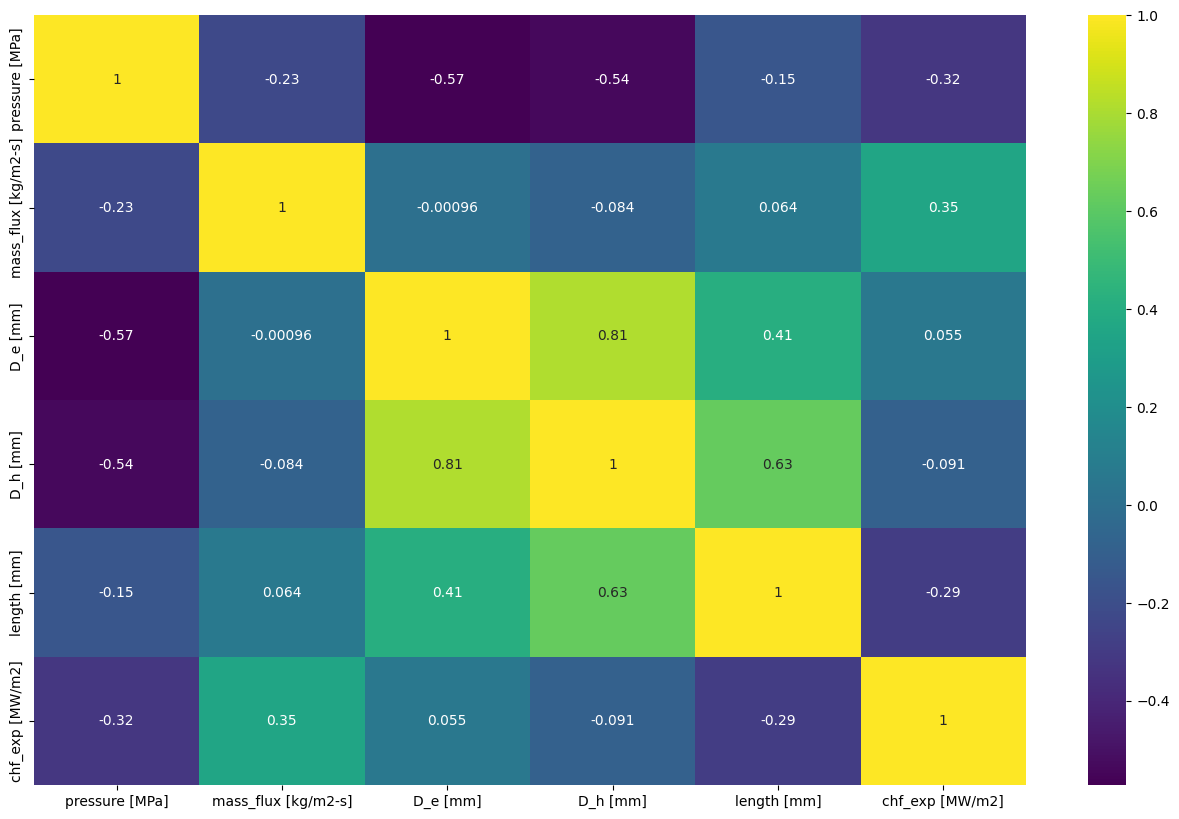

In [13]:
plt.figure(figsize = (16,10))
sns.heatmap(data_all.select_dtypes(include=np.number).corr(method = 'spearman'), annot = True, cmap='viridis')

plt.show()

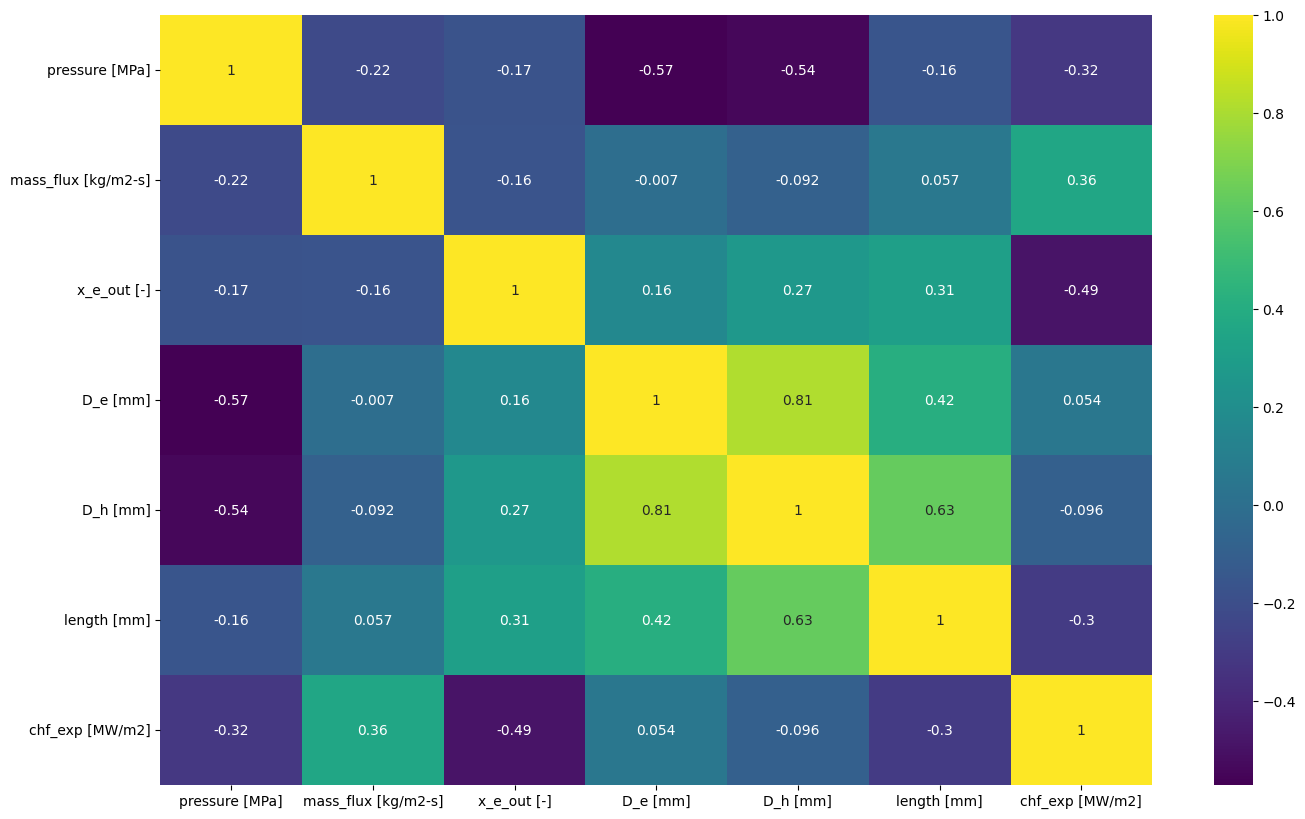

In [14]:
plt.figure(figsize = (16,10))
sns.heatmap(data_trext.select_dtypes(include=np.number).corr(method = 'spearman'), annot = True, cmap='viridis')

plt.show()

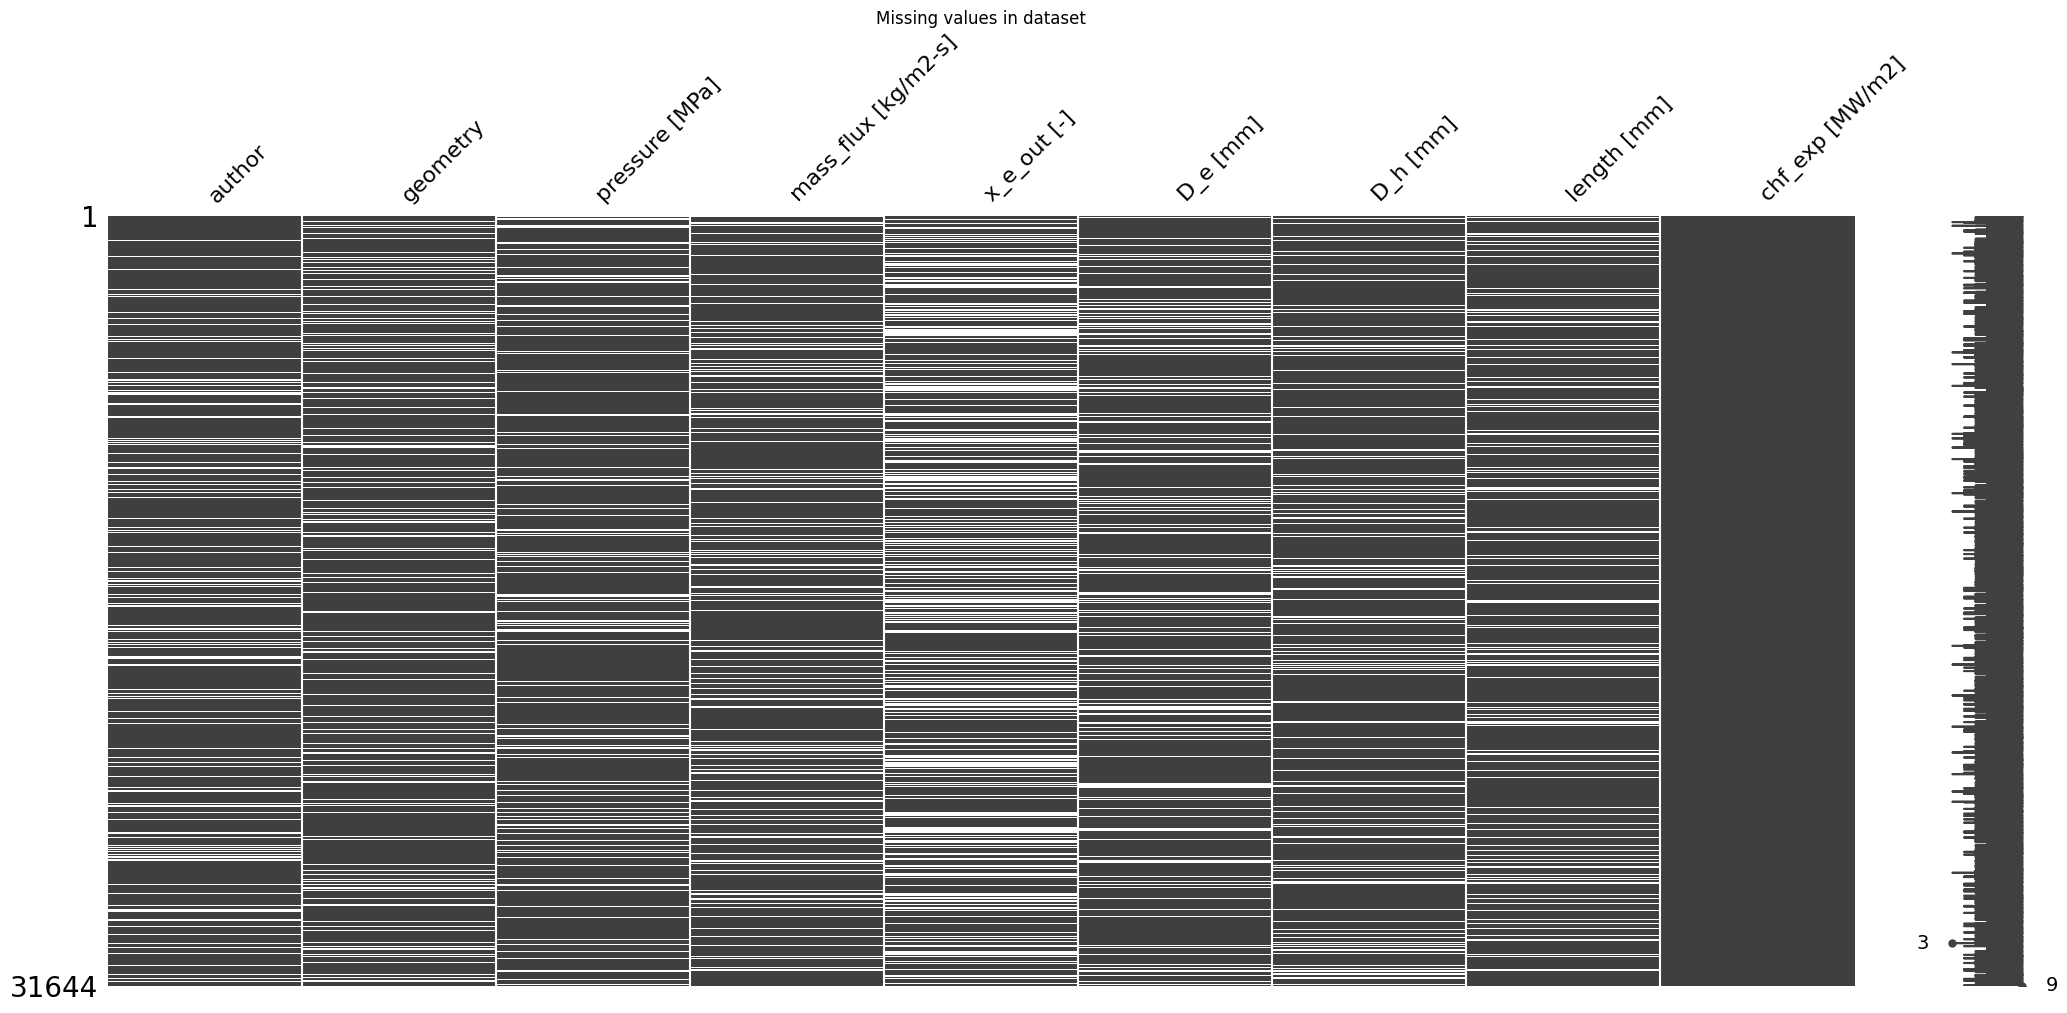

In [15]:
msno.matrix(data)
plt.title('Missing values in dataset')
plt.show()

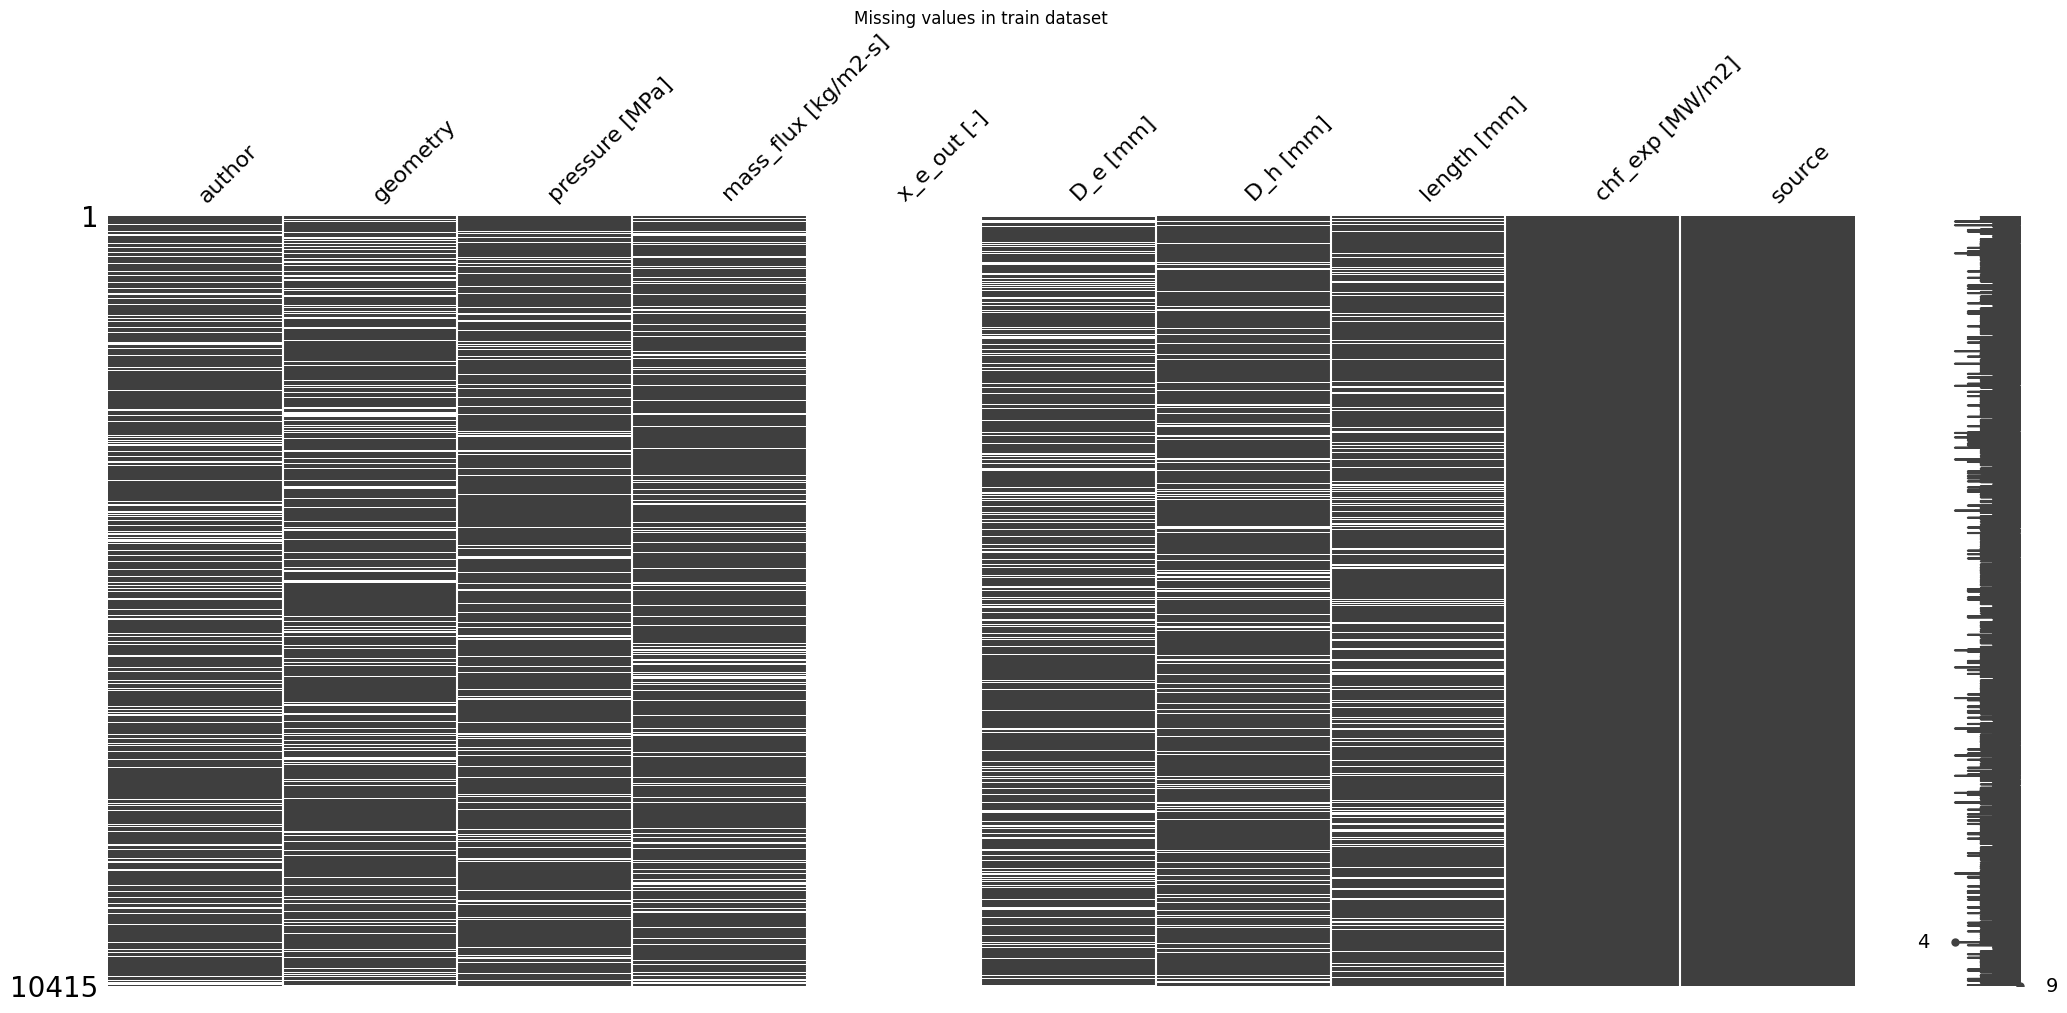

In [16]:
msno.matrix(data_test)
plt.title('Missing values in train dataset')
plt.show()

### Heatmap
The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

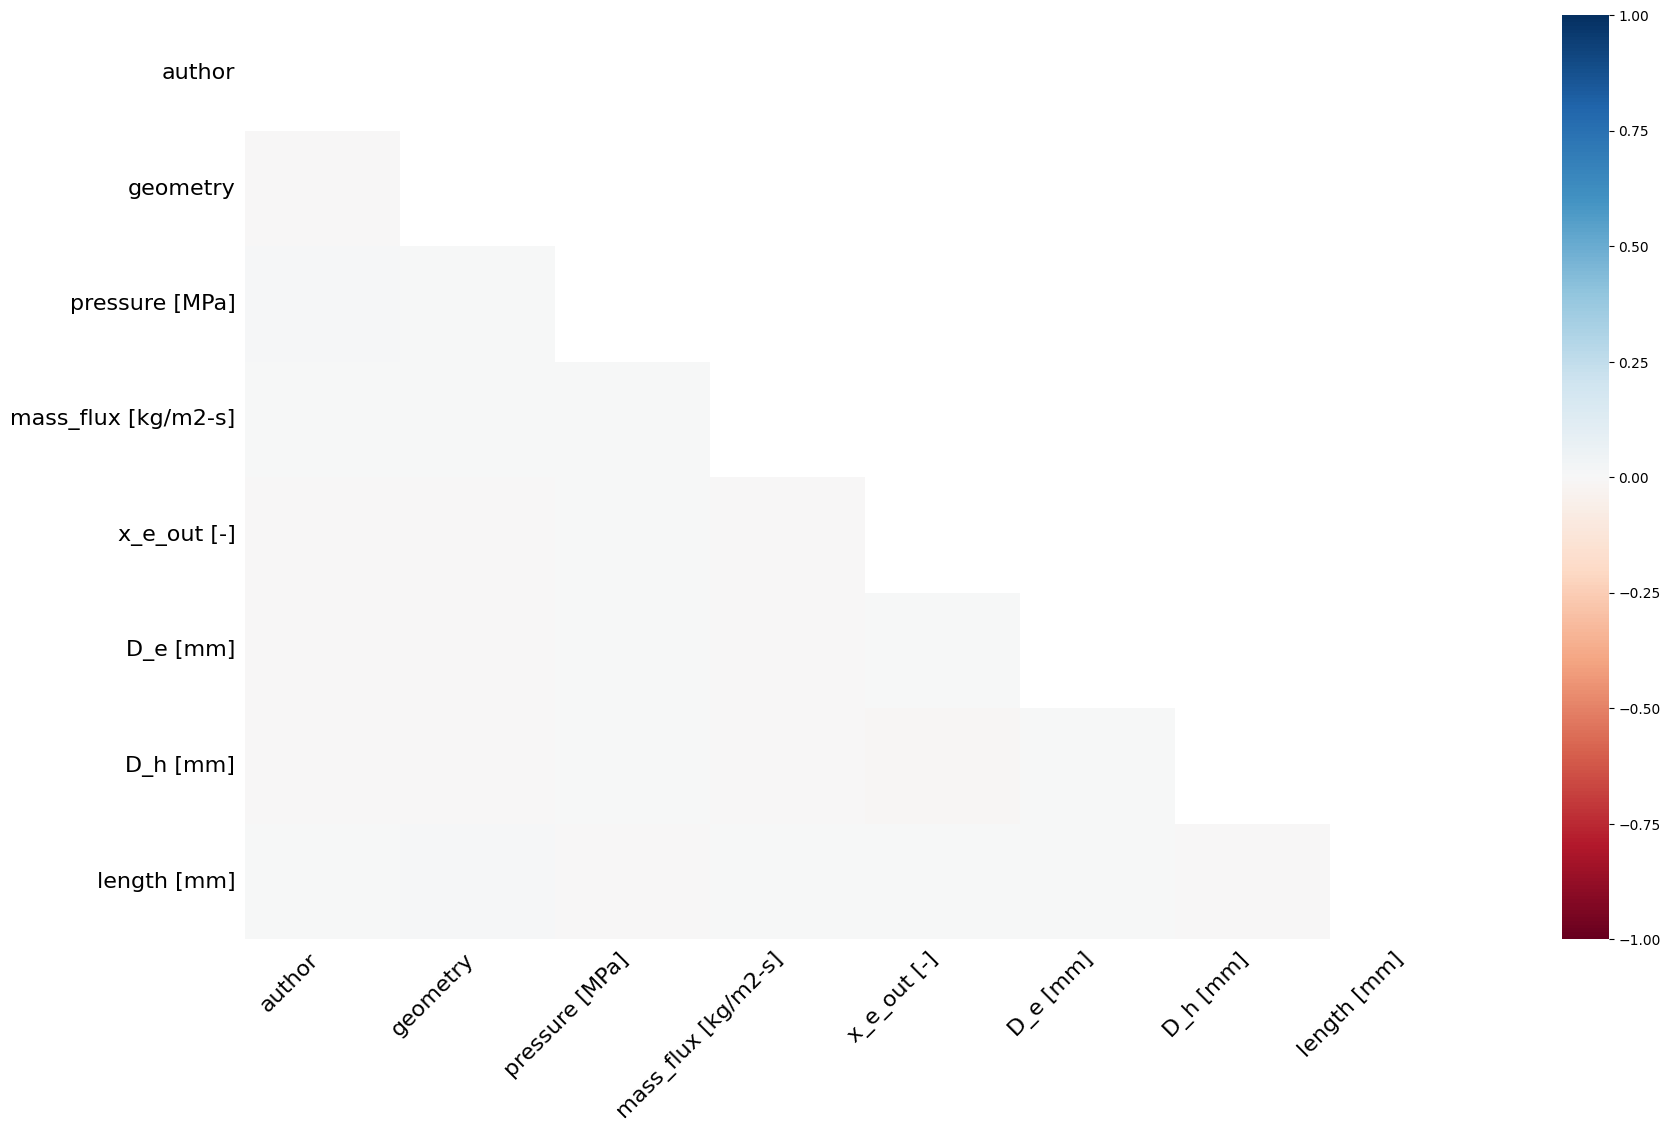

In [17]:
msno.heatmap(data)
plt.show()

There is no correlation between missing values in this dataset.  This confirms that data was omitted randomly.